In [1]:
!pip install yfinance --quiet


In [4]:
import yfinance as yf
import pandas as pd


ticker = "AAPL"

data = yf.download(ticker, period="10y", interval="1d")


data.reset_index(inplace=True)

print(data.head())
print(data.shape)


csv_path = f"{ticker}_10y_OHLCV.csv"
data.to_csv(csv_path, index=False)
print(f"Saved CSV in Colab: {csv_path}")



/tmp/ipython-input-3014207812.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period="10y", interval="1d")
[*********************100%***********************]  1 of 1 completed

Price        Date      Close       High        Low       Open    Volume
Ticker                  MSFT       MSFT       MSFT       MSFT      MSFT
0      2015-08-18  41.257660  41.397309  40.760159  40.882352  23574100
1      2015-08-19  40.681591  41.091812  40.411019  40.829967  31485500
2      2015-08-20  39.852440  40.559416  39.852440  40.210291  36238200
3      2015-08-21  37.591862  39.695330  37.591862  39.538224  70053100
4      2015-08-24  36.378651  37.260186  34.667947  35.305097  88753700
(2515, 6)
Saved CSV in Colab: MSFT_10y_OHLCV.csv


In [90]:

from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

In [91]:

data = pd.read_csv("AAPL_10y_OHLCV.csv")
print(data.head())
print(data.info())
print(data.describe())

         Date               Close                High                 Low  \
0         NaN                AAPL                AAPL                AAPL   
1  2015-08-18  26.180524826049805   26.39176737758443   26.07040979397144   
2  2015-08-19  25.845685958862305  26.185020304557398  25.771526115954153   
3  2015-08-20   25.31534194946289  25.697374825404818  25.086120852281372   
4  2015-08-21    23.7669734954834  25.146788168407536  23.742253549020607   

                 Open     Volume  
0                AAPL       AAPL  
1  26.164794107181464  138242800  
2  26.090635985139684  193146000  
3   25.63669966116292  274006400  
4   24.81644135160456  513102000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2515 non-null   object
 1   Close   2516 non-null   object
 2   High    2516 non-null   object
 3   Low     2516 non-null   object
 4   

In [92]:
data['Date'] = pd.to_datetime(data['Date'])

cols = ['Open', 'High', 'Low', 'Close', 'Volume']

for col in cols:
    data[col] = pd.to_numeric(data[col].str.replace(',', ''), errors='coerce')

print(data.dtypes)

Date      datetime64[ns]
Close            float64
High             float64
Low              float64
Open             float64
Volume           float64
dtype: object


In [93]:
print(data.head())
print(data.info())
print(data.describe())

        Date      Close       High        Low       Open       Volume
0        NaT        NaN        NaN        NaN        NaN          NaN
1 2015-08-18  26.180525  26.391767  26.070410  26.164794  138242800.0
2 2015-08-19  25.845686  26.185020  25.771526  26.090636  193146000.0
3 2015-08-20  25.315342  25.697375  25.086121  25.636700  274006400.0
4 2015-08-21  23.766973  25.146788  23.742254  24.816441  513102000.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2515 non-null   datetime64[ns]
 1   Close   2515 non-null   float64       
 2   High    2515 non-null   float64       
 3   Low     2515 non-null   float64       
 4   Open    2515 non-null   float64       
 5   Volume  2515 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 118.1 KB
None
                                Date        Close       

In [94]:
stock_data = data.filter(['Open', 'High', 'Low', 'Close'])
stock_data = stock_data.fillna(method='ffill')  # forward-fill NaNs
stock_data = stock_data.dropna()
dataset = stock_data.values
training_data_len = int(np.ceil(len(dataset) * 0.95))

/tmp/ipython-input-3773794740.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data = stock_data.fillna(method='ffill')  # forward-fill NaNs


In [95]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

training_data = scaled_data[:training_data_len]

X_train, y_train = [], []


# Create a sliding window for our stock (60 days)
for i in range(60, len(training_data)):
    X_train.append(training_data[i-60:i])
    y_train.append(training_data[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 4))

print(X_train.shape)
print(X_train[:5])
print(y_train.shape)
print(y_train[:5])


(2330, 60, 4)
[[[-1.14510877 -1.1460814  -1.14239039 -1.14508497]
  [-1.14617858 -1.1490317  -1.14674541 -1.14991009]
  [-1.15272712 -1.15599046 -1.15673243 -1.15755251]
  ...
  [-1.12825587 -1.1303953  -1.12560436 -1.12863987]
  [-1.1287443  -1.13039535 -1.12747885 -1.13023351]
  [-1.14196284 -1.14244035 -1.14059995 -1.14259198]]

 [[-1.14617858 -1.1490317  -1.14674541 -1.14991009]
  [-1.15272712 -1.15599046 -1.15673243 -1.15755251]
  [-1.16456027 -1.16384739 -1.17631389 -1.17986495]
  ...
  [-1.1287443  -1.13039535 -1.12747885 -1.13023351]
  [-1.14196284 -1.14244035 -1.14059995 -1.14259198]
  [-1.14368838 -1.1445337  -1.14339512 -1.1447384 ]]

 [[-1.15272712 -1.15599046 -1.15673243 -1.15755251]
  [-1.16456027 -1.16384739 -1.17631389 -1.17986495]
  [-1.2150045  -1.17378864 -1.22101039 -1.18841422]
  ...
  [-1.14196284 -1.14244035 -1.14059995 -1.14259198]
  [-1.14368838 -1.1445337  -1.14339512 -1.1447384 ]
  [-1.14404649 -1.14646603 -1.14194816 -1.14600675]]

 [[-1.16456027 -1.16384739

In [96]:

model = keras.models.Sequential()

model.add(keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1],4)))

model.add(keras.layers.LSTM(64, return_sequences=False))

model.add(keras.layers.Dense(128, activation='relu'))

model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(1))

model.summary()
model.compile(
    optimizer='adam',
    loss='mae',
    metrics=[keras.metrics.RootMeanSquaredError()]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 60, 64)         │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,137 (231.00 KB)

 Trainable params: 59,137 (231.00 KB)

 Non-trainable params: 0 (0.00 B)

In [97]:
training = model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - loss: 0.3122 - root_mean_squared_error: 0.4187
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.1191 - root_mean_squared_error: 0.1561
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 0.1213 - root_mean_squared_error: 0.1584
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.1053 - root_mean_squared_error: 0.1412
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.1126 - root_mean_squared_error: 0.1493
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 0.1119 - root_mean_squared_error: 0.1506
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - loss: 0.1092 - root_mean_squared_error: 0.1456
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 0.1079 - root_mean_squared_error: 0.1437
Epoch 9/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.1006 - root_mean_squared_error: 0.1341
Epoch 10/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - loss: 0.1001 - root_mean_squared_error: 0.1349

In [98]:
test_data = scaled_data[training_data_len - 60:]
X_test, y_test = [], dataset[training_data_len:]


for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, :])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],4 ))

print(X_test.shape)
print(X_test[:5])
print(y_test.shape)
print(y_test[:5])

(125, 60, 4)
[[[1.74029289 1.75009557 1.76871199 1.75559102]
  [1.75581799 1.74682488 1.75753195 1.76592973]
  [1.76760561 1.75009549 1.7549185  1.75903726]
  ...
  [1.8867822  1.92707951 1.90184089 1.94966535]
  [1.94923848 1.97277465 1.98062252 1.99379687]
  [1.99097203 1.9675075  1.99297752 1.99192808]]

 [[1.75581799 1.74682488 1.75753195 1.76592973]
  [1.76760561 1.75009549 1.7549185  1.75903726]
  [1.75581793 1.75805844 1.78903901 1.7784222 ]
  ...
  [1.94923848 1.97277465 1.98062252 1.99379687]
  [1.99097203 1.9675075  1.99297752 1.99192808]
  [1.99831153 1.9793228  2.01216434 1.99767804]]

 [[1.76760561 1.75009549 1.7549185  1.75903726]
  [1.75581793 1.75805844 1.78903901 1.7784222 ]
  [1.80469347 1.79403419 1.81343187 1.82150025]
  ...
  [1.99097203 1.9675075  1.99297752 1.99192808]
  [1.99831153 1.9793228  2.01216434 1.99767804]
  [2.00234088 1.99028393 2.0285891  2.01147815]]

 [[1.75581793 1.75805844 1.78903901 1.7784222 ]
  [1.80469347 1.79403419 1.81343187 1.82150025]
  [

In [99]:
predictions = model.predict(X_test)


dummy_array = np.zeros((predictions.shape[0], dataset.shape[1]))


dummy_array[:, 0] = predictions[:, 0]


predictions = scaler.inverse_transform(dummy_array)[:, 0]
print(predictions[:5])
print(y_test[:5])

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step
[240.88263258 241.97664499 242.73691387 243.10280215 243.62267124]
[[244.06260076 245.40929524 242.56626341 244.27207947]
 [244.34191013 246.17741358 243.69348816 245.22973633]
 [245.34944139 248.0827564  244.62122815 244.95042419]
 [244.33192833 248.25234006 243.82317911 246.49664307]
 [247.39444545 249.38956195 244.31199412 246.43678284]]


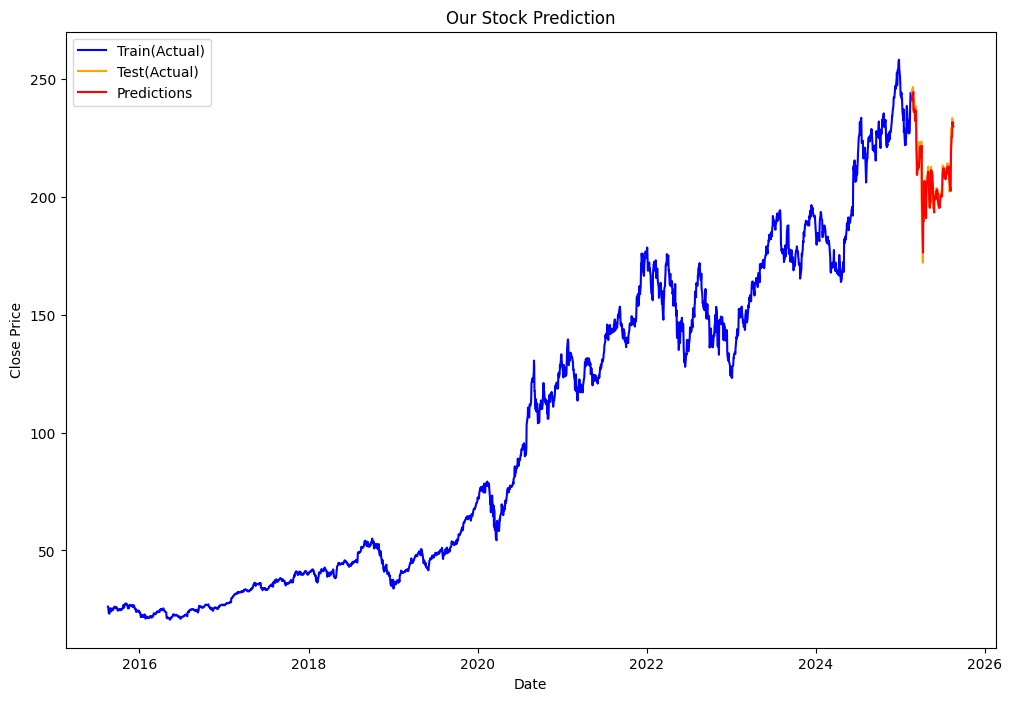

In [100]:
train = data[:training_data_len]
test = data[training_data_len:]

test = test.copy()


test = test[1:]

test['Predictions'] = predictions

plt.figure(figsize=(12,8))
plt.plot(train['Date'], train['Close'], label="Train(Actual)", color="blue")
plt.plot(test['Date'], test['Close'], label="Test(Actual)", color="orange")
plt.plot(test['Date'], test['Predictions'], label="Predictions", color="red")
plt.title("Our Stock Prediction")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

Testing the prediction


In [83]:
latest_60 = data.tail(60)
print(latest_60.head())

           Date       Close        High         Low        Open      Volume
2456 2025-05-22  454.859985  460.250000  453.899994  454.950012  18025600.0
2457 2025-05-23  450.179993  453.690002  448.910004  449.980011  16883500.0
2458 2025-05-27  460.690002  460.950012  456.119995  456.480011  20974300.0
2459 2025-05-28  457.359985  462.519989  456.929993  461.220001  17086300.0
2460 2025-05-29  458.679993  461.720001  455.309998  461.549988  13974800.0


In [101]:
latest_60_features = latest_60[['Open', 'High', 'Low', 'Close']]
latest_60_features = latest_60_features.fillna(method='ffill')
latest_60_features = latest_60_features.dropna()
print(latest_60.head())

           Date       Close        High         Low        Open      Volume
2456 2025-05-22  454.859985  460.250000  453.899994  454.950012  18025600.0
2457 2025-05-23  450.179993  453.690002  448.910004  449.980011  16883500.0
2458 2025-05-27  460.690002  460.950012  456.119995  456.480011  20974300.0
2459 2025-05-28  457.359985  462.519989  456.929993  461.220001  17086300.0
2460 2025-05-29  458.679993  461.720001  455.309998  461.549988  13974800.0


/tmp/ipython-input-2895298810.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  latest_60_features = latest_60_features.fillna(method='ffill')


In [102]:
X_input = latest_60_features.values
print(X_input.shape)

(60, 4)


In [103]:
scaled_input = scaler.transform(X_input)

In [104]:
# Reshape the last 60 days for model input
X_input_reshaped = scaled_input.reshape(1, 60, 4)

#  Predict using your trained model
prediction_scaled = model.predict(X_input_reshaped)  # shape: (1,1)
print("Scaled prediction:", prediction_scaled)

print("prediction scaled shape",prediction_scaled.shape)
print("dataset shape",dataset.shape)
# Create dummy array to match scaler shape
dummy_array = np.zeros((prediction_scaled.shape[0], dataset.shape[1]))  # 4 columns
print("dummy array shape",dummy_array.shape)
dummy_array[:, 3] = prediction_scaled[:, 0]  # put predicted Close in 4th column
print("dummy array shape",dummy_array)

# Inverse transform to original scale
prediction_real = scaler.inverse_transform(dummy_array)[:, 3]  # take only Close column
print("Predicted Close price:", prediction_real)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Scaled prediction: [[5.035248]]
prediction scaled shape (1, 1)
dataset shape (2515, 4)
dummy array shape (1, 4)
dummy array shape [[0.        0.        0.        5.0352478]]
Predicted Close price: [455.06376553]


In [105]:
model.save(f'AAPL_model.h5')